# 워드 클라우드: 

## 문재인대통령 2018년 신년사(url이용)
- 청와대 : https://www1.president.go.kr/articles/2029 </font>
- 과제1. 문재인대통령 연설문을 크롤링
- 과제2. 의미없는 글자는 필터링 후 워드클라우드 생성문재인 대통령

In [1]:
from IPython.display import Image 

from konlpy.tag import Hannanum
from lxml import html
from collections import Counter
from urllib.request import urlopen

import sys
import random
import webbrowser
import pytagcloud 

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
! pip install pytagcloud

In [3]:
!pip install pygame

In [4]:
! pip install simplejson

In [5]:
rndno = lambda: random.randint(0, 255)
color = lambda: (rndno(), rndno(), rndno())

In [6]:
color()

(205, 1, 242)

In [7]:
# 대한민국 정치의 모든 것; 인물, 의안, 정당, 지역
# text: 문장, multipier: 글자크기 관련 옵션
def get_tags(text, ntags=50, multiplier=10):
    hannanum = Hannanum()
    nouns = hannanum.nouns(text)
    count = Counter(nouns)
    return [
        {'color' : color(),
         'tag' : n,
         'size' : c*multiplier,
        }
        for n, c in count.most_common(ntags)
    ]
# 빈도가 가장 높은 순으로 50개 중에서 n: 언어, c: 개수
# n : 단어, size: 글자 크기가 너무 작으므로,  키워줌.(단어 빈도수 * 10)
# color: 랜덤으로 생성

In [8]:
# wordCloud로 그려주는 함수
def draw_cloud(tags, filename, fontname='Korean', size=(800, 600)):
    pytagcloud.create_tag_image(tags, filename, fontname=fontname, size=size)
    # webbrowser.open(filename)
    # 한글 폰트를 설정해야 함.

In [9]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [10]:
!pip install BeautifulSoup


  Using cached https://files.pythonhosted.org/packages/1e/ee/295988deca1a5a7accd783d0dfe14524867e31abb05b6c0eeceee49c759d/BeautifulSoup-3.2.1.tar.gz


    ERROR: Complete output from command python setup.py egg_info:
    ERROR: Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-install-fzg5aqi9\BeautifulSoup\setup.py", line 22
        print "Unit tests have failed!"
                                      ^
    SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Unit tests have failed!")?
    ----------------------------------------
ERROR: Command "python setup.py egg_info" failed with error code 1 in C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-install-fzg5aqi9\BeautifulSoup\


In [11]:
# 데이터 가져오기
url = 'https://www1.president.go.kr/articles/2029'
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

In [12]:
print(str(soup)[:1000])# 1000글자

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="#082e59" name="theme-color"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." name="description"/>
<meta content="청와대, 대통령비서실, 대통령, 한국, 대한민국, 대한민국 정부, president.go.kr, 靑瓦臺, 19대, 문재인" name="keywords"/>
<meta content="청와대 (CHEONGWADAE)" name="author"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="website" property="og:type"/>
<meta content="2018 문재인 대통령 신년사 &gt;  대한민국 청와대" property="og:title"/>
<meta content="https://www1.president.go.kr/articles/2029" property="og:url"/>
<meta content="대한민국 청와대" property="og:site_name"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." property="og:description"/>
<meta content="https://www1.president.go.kr/storage/thumbnail/HJqG4oog1zl5o1RI8DC67BykVQxcN0YTNTxtxJRQ.jpeg" property="og:image"/>
<meta conte

In [13]:
# 게시글 가져오기
#url속 html확인:  <div class="text left cb text_wrap motion fadeIn visible" data-animation="fadeIn">
# 코드에 공백, 쉼표 등이 없고, 본문을 모두 포함하는 class 찾기
speech = soup.find('div', 'cs_body')  # html보고 전문을 포함하는 class 찾기
speech

<div class="cs_body">
<div class="cs_view cs_v1 wrap text left">
<div class="cs_viewhead">
<h3 class="title bold cb motion" data-animation="fadeInDown">2018 문재인 대통령 신년사</h3>
<span class="ci cs_date motion" data-animation="fadeIn">2018-01-10</span>
</div>
<div class="video_wrap">
<iframe allowfullscreen="" class="video" frameborder="0" src="https://www.youtube.com/embed/Y5UNzCKTNwQ?rel=0" title="동영상 재생 영역"></iframe>
</div>
<div class="text left cb text_wrap motion" data-animation="fadeIn">
<p>“내 삶이 나아지는 나라”</p><p><br/></p><p>존경하는 국민 여러분, </p><p><br/></p><p>지난 일 년, 저는 평범함이 가장 위대하다는 것을 </p><p>하루하루 느꼈습니다.</p><p>촛불광장에서 저는 군중이 아닌 </p><p>한 사람 한 사람의 평범한 국민을 보았습니다.</p><p>어머니에서 아들로, 아버지에서 딸로 이어지는 역사가</p><p>그 어떤 거대한 역사의 흐름보다 중요하다는 것을 깨달았습니다.</p><p>한겨울 내내 촛불을 든 후 다시 일상을 충실히 살아가는 </p><p>평범한 가족들을 보면서 </p><p>저는 우리의 미래를 낙관할 수 있습니다. </p><p><br/></p><p>우리가 민주주의의 역사를 다시 쓸 수 있었던 것은 </p><p>그렇게 평범한 사람, 평범한 가족의 용기있는 삶이 </p><p>우리 주변에 항상 존재하고 있었기 때문입니다.</p><p>저는 그것이 너무나 자랑스럽습니다.</p><p>덕분에 우리는 오늘 희망을 다시 이야기할 수 

- 어느정도 전처리 한 후 pos처리하기-> 시간이 너무 오래 걸림

In [14]:
# 글자만 추출
speech_txt = speech.get_text()
speech_txt[:1000]

'\n\n\n2018 문재인 대통령 신년사\n2018-01-10\n\n\n\n\n\n“내 삶이 나아지는 나라”존경하는 국민 여러분,\xa0지난 일 년, 저는 평범함이 가장 위대하다는 것을\xa0하루하루 느꼈습니다.촛불광장에서 저는 군중이 아닌\xa0한 사람 한 사람의 평범한 국민을 보았습니다.어머니에서 아들로, 아버지에서 딸로 이어지는 역사가그 어떤 거대한 역사의 흐름보다 중요하다는 것을 깨달았습니다.한겨울 내내 촛불을 든 후 다시 일상을 충실히 살아가는\xa0평범한 가족들을 보면서\xa0저는 우리의 미래를 낙관할 수 있습니다.\xa0우리가 민주주의의 역사를 다시 쓸 수 있었던 것은\xa0그렇게 평범한 사람, 평범한 가족의 용기있는 삶이\xa0우리 주변에 항상 존재하고 있었기 때문입니다.저는 그것이 너무나 자랑스럽습니다.덕분에 우리는 오늘 희망을 다시 이야기할 수 있게 되었습니다.국민들께서는 자신의 소중한 일상을 국가에 내어주었습니다.나라를 바로 세울 힘을 주었습니다.이제 국가는 국민들에게 응답해야 합니다.더 정의롭고, 더 평화롭고, 더 안전하고, 더 행복한 삶을 약속해야 합니다.\xa0그것이 바로 나라다운 나라입니다.\xa02018년 새해, 정부와 저의 목표는국민들의 평범한 일상을 지키고, 더 나아지게 만드는 것입니다.국민의 뜻과 요구를 나침반으로 삼겠습니다.국민들께서 삶의 변화를 체감할 수 있게 하겠습니다.\xa0국민 여러분,\xa0제가 대통령이 되어 제일 먼저 한 일은집무실에 일자리 상황판을 설치한 것입니다.‘사람중심 경제’라는 국정철학을 실천하기 위해서였습니다.일자리는 우리 경제의 근간이자 개개인의 삶의 기반입니다.‘사람중심 경제’의 핵심에 일자리가 있습니다.정부는 좋은 일자리 확대를 위해\xa0지난해 추경으로 마중물을 붓고,정부 지원체계를 전면 개편했습니다.공공부문 비정규직의 정규직화가 시작되었고,8년만의 대타협으로 올해 최저임금 인상률을 16.4%로 결정했습니다.일자리 문제 해결에 앞장서는 기업들도 늘어났습니다.노사 간에도 일자리의 상생을 위한 뜻깊

In [15]:
speech_txt = speech_txt.replace('\r', ' ')
speech_txt = speech_txt.replace('\n', ' ')
speech_txt = speech_txt.replace('\xa0', ' ')

In [16]:
# 글자 개수 세기
speech_tags = get_tags(speech_txt)
speech_tags

C:\Python\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[{'color': (73, 7, 162), 'tag': '국민', 'size': 440},
 {'color': (133, 245, 63), 'tag': '것', 'size': 290},
 {'color': (203, 8, 248), 'tag': '수', 'size': 240},
 {'color': (173, 120, 99), 'tag': '삶', 'size': 210},
 {'color': (0, 178, 203), 'tag': '우리', 'size': 200},
 {'color': (70, 171, 166), 'tag': '정부', 'size': 200},
 {'color': (55, 118, 32), 'tag': '저', 'size': 170},
 {'color': (203, 126, 209), 'tag': '일자리', 'size': 140},
 {'color': (188, 241, 24), 'tag': '평화', 'size': 110},
 {'color': (214, 109, 91), 'tag': '여러분', 'size': 90},
 {'color': (139, 11, 55), 'tag': '정규직', 'size': 80},
 {'color': (152, 174, 238), 'tag': '대한민국', 'size': 80},
 {'color': (244, 50, 74), 'tag': '등', 'size': 70},
 {'color': (245, 11, 119), 'tag': '지원', 'size': 70},
 {'color': (40, 11, 123), 'tag': '존경', 'size': 70},
 {'color': (170, 63, 146), 'tag': '대통령', 'size': 60},
 {'color': (40, 16, 194), 'tag': '평범', 'size': 60},
 {'color': (59, 166, 206), 'tag': '중요', 'size': 60},
 {'color': (109, 64, 200), 'tag': '촛불', 'si

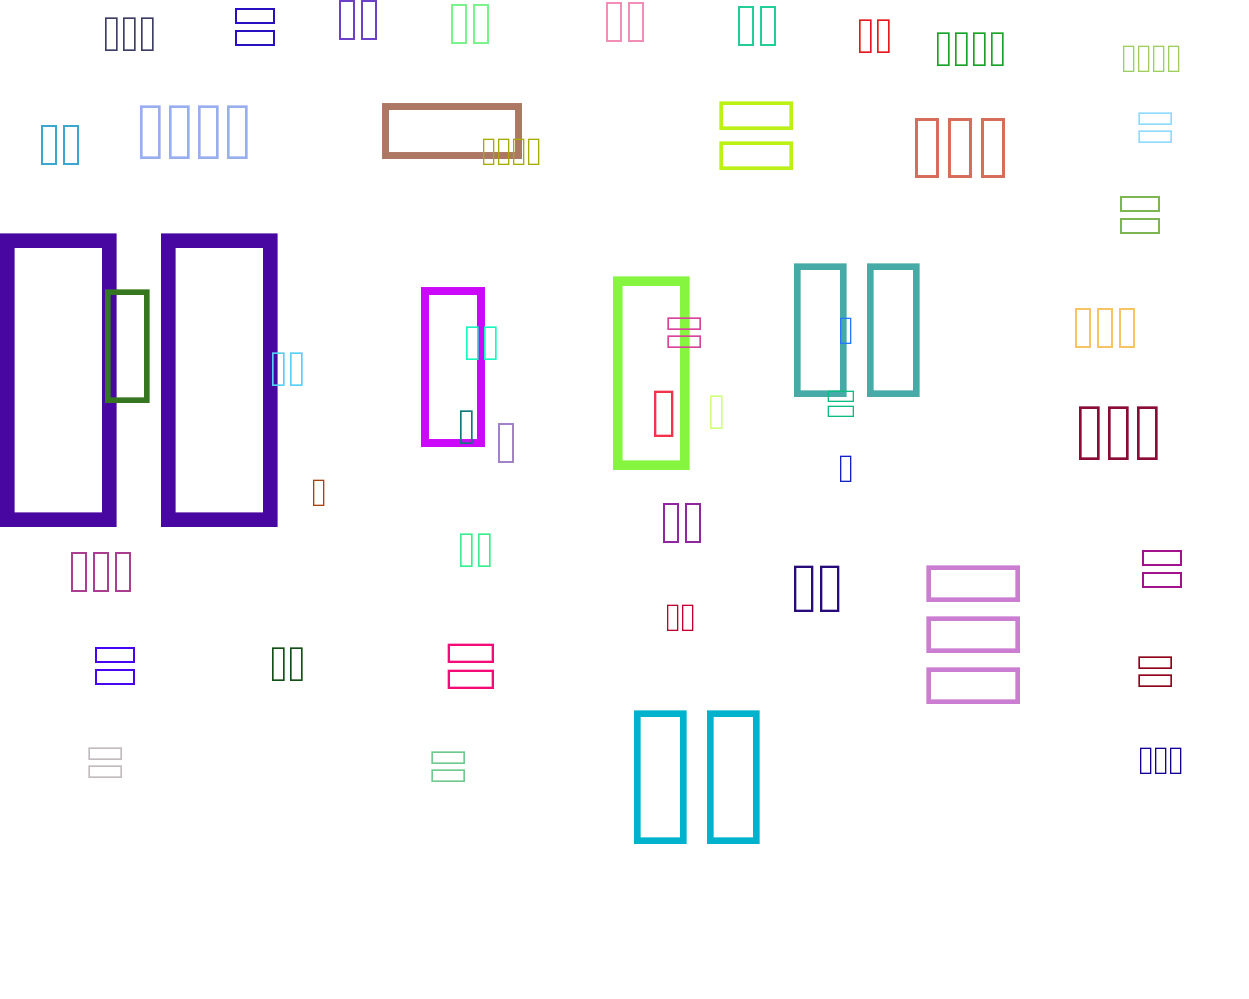

In [17]:
img_wordcloud = 'wordcloud/moon_speech_2018.png'
draw_cloud(speech_tags, img_wordcloud, fontname='Nobile', size=(1400, 1000))
Image(img_wordcloud)

# Nobile: 기본적으로 제공해주는 영문폰트


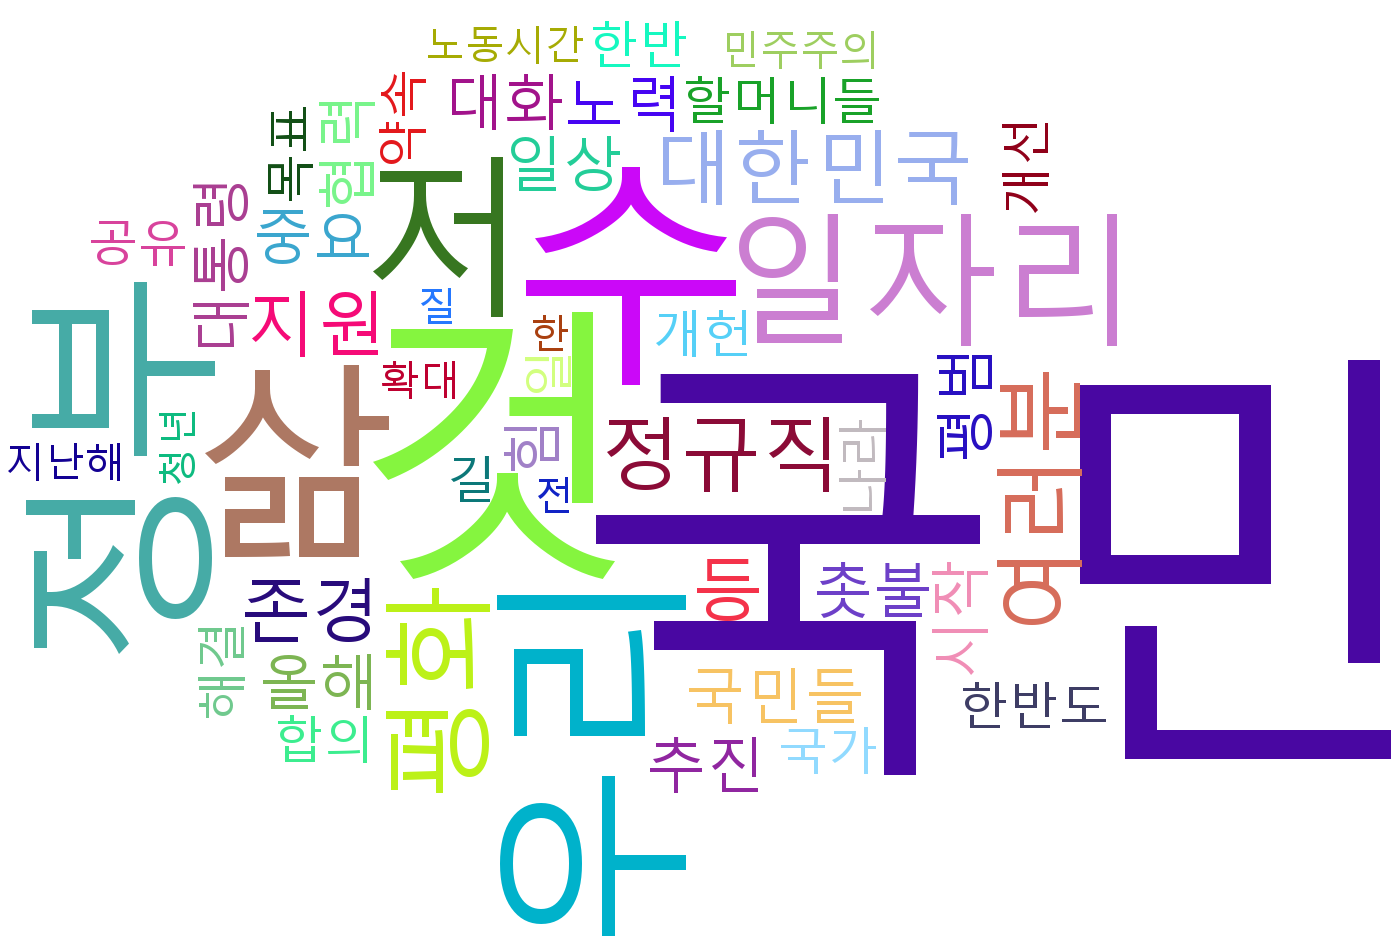

In [18]:
img_wordcloud = 'wordcloud/moon_speech_2018.png'
draw_cloud(speech_tags, img_wordcloud, fontname='Korean', size=(1400, 1000))
Image(img_wordcloud)

# Nobile: 기본적으로 제공해주는 영문폰트
# 한글이 잘 보여지도록 설정하기

## korean 설정하기
- fonts.json 파일을 워드패드로 열고 아래 문구 추가
- {
		"name": "Korean",
		"ttf": "margun.ttf",
		"web": "http://fonts.googleapis.com/css?family=Nobile"
	},


- C:\Python\Anaconda3\Lib\site-packages\pytagcloud\fonts에 한글 폰트 추가하고